<a href="https://colab.research.google.com/github/taruj/BikeSharing_Assignment/blob/main/BikeSharing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bike Sharing - Assignment
### A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The Comany has decided to come up with a mindful business plan to be able to increase/ accelerate revenue as soon as the ongoing lockdown ends and the economy shows signs of recovery.

## Business Goal:
### You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 



In [39]:
# Load Data from Google Drive
from google.colab import drive
drive.mount('/content/drive/')

# Import Data Wrangling and Visulization Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") # Supress Warnings 

# Import Libraries for Linear Regression

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor



 # Set float format to 2 decimal points 
pd.options.display.float_format = '{:.4f}'.format

plt.rcParams["figure.figsize"] = (10,10) # Set Default figsize of 15 by 15
plt.rcParams["axes.titlesize"] = 15
pd.set_option('display.max_columns', None)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Data Loading and Gain Basic Insights
+ ### .head() -> Return top n (5 by default) rows of a data frame or series
+ ### .shape -> Return a tuple representing the dimensionality of the DataFrame. (Number of Rows X Columns)
+ ### .info() -> Count of data (cross check with shape) and Data Types
+ ### .describe() -> Returns description of the data in the DataFrame. For numerical data it provides

> 1. count - The number of not-empty values.
> 2. mean - The average (mean) value.
> 3. std - The standard deviation.
> 4. min - the minimum value.
> 5. 25% - The 25% percentile.
> 6. 50% - The 50% percentile.
> 7. 75% - The 75% percentile.
> 8. max - the maximum value

+ ### isnull().sum() -> Additional Check on count (number of) null values per column



In [40]:
bike_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/day.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.1108,18.1812,80.5833,10.7499,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.9026,17.6869,69.6087,16.6521,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.0509,9.4703,43.7273,16.6367,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.2000,10.6061,59.0435,10.7398,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.3052,11.4635,43.6957,12.5223,82,1518,1600


In [41]:
# Get Data Shape (Rows by Cloumns)
bike_data.shape

(730, 16)

In [42]:
# Count of Missing data and Data Types
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


 <font color='dodgerblue'>No Missing data, Data Type for dteday is object rest all are numerical data

In [43]:
 #<font color='red'>bar</font> 
 # Descriptive stats of the data for Central Tendency, Dispersion
 bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000
mean,365.5000,2.4986,0.5000,6.5260,0.0288,2.9973,0.6836,1.3945,20.3193,23.7263,62.7652,12.7636,849.2493,3658.7575,4508.0068
std,210.8771,1.1102,0.5003,3.4502,0.1673,2.0062,0.4654,0.5448,7.5067,8.1503,14.2376,5.1958,686.4799,1559.7587,1936.0116
min,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,2.4243,3.9535,0.0000,1.5002,2.0000,20.0000,22.0000
25%,183.2500,2.0000,0.0000,4.0000,0.0000,1.0000,0.0000,1.0000,13.8119,16.8897,52.0000,9.0417,316.2500,2502.2500,3169.7500
50%,365.5000,3.0000,0.5000,7.0000,0.0000,3.0000,1.0000,1.0000,20.4658,24.3682,62.6250,12.1253,717.0000,3664.5000,4548.5000
75%,547.7500,3.0000,1.0000,10.0000,0.0000,5.0000,1.0000,2.0000,26.8806,30.4458,72.9896,15.6256,1096.5000,4783.2500,5966.0000
max,730.0000,4.0000,1.0000,12.0000,1.0000,6.0000,1.0000,3.0000,35.3283,42.0448,97.2500,34.0000,3410.0000,6946.0000,8714.0000


In [44]:
# Additional check for Null Data
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

 <font color='dodgerblue'>No Null Values</font> 

# Data Cleaning

1. #### instant: record index -> We can drop instant as it will not add any value to the prediction
2. #### dteday : date -> We can drop drop dteday as month and weekday are available
3. ### Total Counts are Available we can drop
> + #### casual: count of casual users
> + #### registered: count of registered users

### .drop() Drop the column, with parameter inplace=True so that the data is removed from the current dataframe


In [45]:
bike_data.drop(['instant'], axis = 1, inplace = True)

In [46]:
bike_data.drop(['dteday'], axis = 1, inplace = True)

In [47]:
bike_data.drop(['casual'], axis = 1, inplace = True)

In [48]:
bike_data.drop(['registered'], axis = 1,inplace = True)

### Identify the remaining data, data types and run
.corr() to Compute pairwise correlation of columns (excluding NA/null values)

In [49]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [50]:
bike_data.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.0000,-0.0000,0.8310,-0.0109,-0.0031,0.0138,0.0213,0.3334,0.3420,0.2082,-0.2296,0.4046
yr,-0.0000,1.0000,-0.0000,0.0082,-0.0055,-0.0029,-0.0503,0.0488,0.0472,-0.1125,-0.0116,0.5697
mnth,0.8310,-0.0000,1.0000,0.0189,0.0095,-0.0047,0.0456,0.2191,0.2264,0.2249,-0.2080,0.2782
holiday,-0.0109,0.0082,0.0189,1.0000,-0.1020,-0.2529,-0.0344,-0.0288,-0.0327,-0.0157,0.0063,-0.0688
weekday,-0.0031,-0.0055,0.0095,-0.1020,1.0000,0.0358,0.0311,-0.0002,-0.0075,-0.0523,0.0143,0.0675
workingday,0.0138,-0.0029,-0.0047,-0.2529,0.0358,1.0000,0.0602,0.0535,0.0529,0.0232,-0.0187,0.0625
weathersit,0.0213,-0.0503,0.0456,-0.0344,0.0311,0.0602,1.0000,-0.1195,-0.1206,0.5903,0.0398,-0.2959
temp,0.3334,0.0488,0.2191,-0.0288,-0.0002,0.0535,-0.1195,1.0000,0.9917,0.1286,-0.1582,0.6270
atemp,0.3420,0.0472,0.2264,-0.0327,-0.0075,0.0529,-0.1206,0.9917,1.0000,0.1415,-0.1839,0.6307
hum,0.2082,-0.1125,0.2249,-0.0157,-0.0523,0.0232,0.5903,0.1286,0.1415,1.0000,-0.2485,-0.0985


# Identify Outliers
### Import Data Dictionary 
### Find Number of Unique Values
### Find Outliers using Box Plot


### Data Dictionary 
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog	- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- cnt: count of total rental bikes including both casual and registered

In [51]:
bike_data.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

### From Data Dictionary and nunique Data we can Conclude **Outliers** can exist in 
- atem
- temp
- hum (humidity)
- winspeed

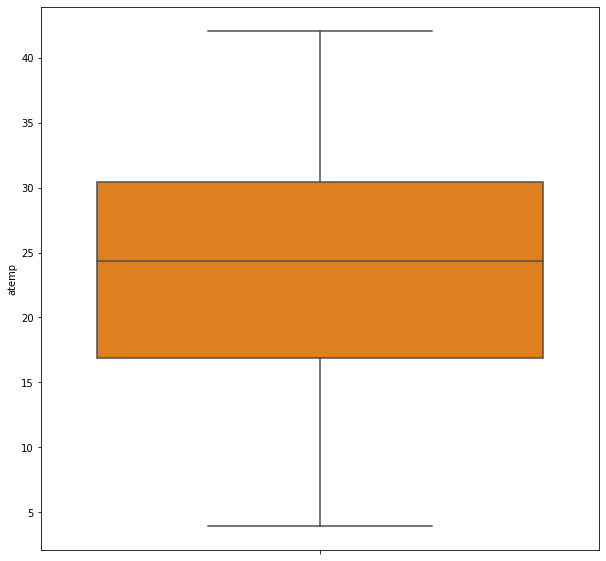

In [52]:
sns.boxplot(y=bike_data.atemp, data=bike_data, orient="h", palette="autumn")
plt.show()

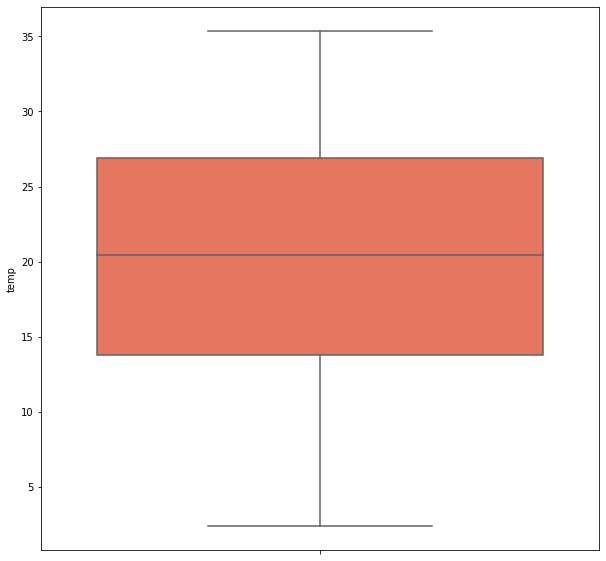

In [53]:
sns.boxplot(y=bike_data.temp, data=bike_data, orient="h", palette="Reds")
plt.show()

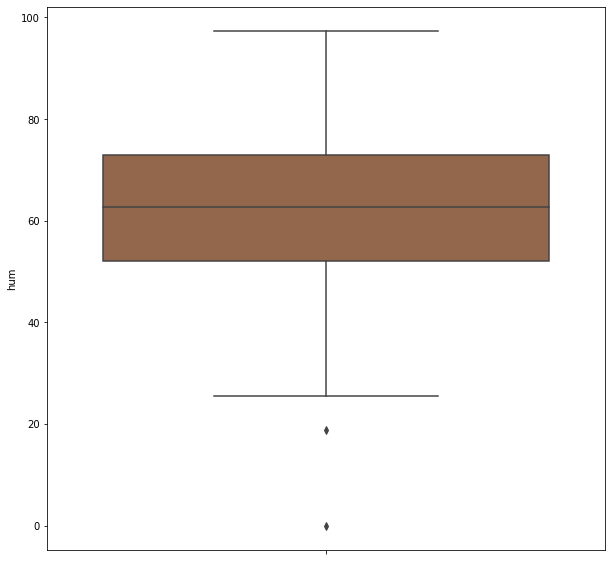

In [54]:
sns.boxplot(y=bike_data.hum, data=bike_data, orient="h", palette="copper")
plt.show()

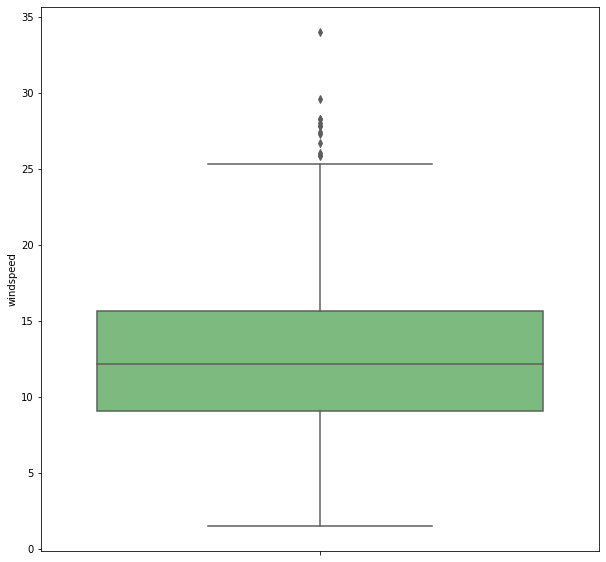

In [55]:
sns.boxplot(y=bike_data.windspeed, data=bike_data, orient="h", palette="Greens")
plt.show()

In [56]:
windq = bike_data.windspeed.quantile(np.arange(0.05,1,0.05))
windq

0.0500    5.3261
0.1000    6.7048
0.1500    7.7435
0.2000    8.3885
0.2500    9.0417
0.3000    9.5836
0.3500   10.2502
0.4000   10.9416
0.4500   11.4607
0.5000   12.1253
0.5500   12.6675
0.6000   13.4338
0.6500   14.2162
0.7000   14.9713
0.7500   15.6256
0.8000   16.6398
0.8500   18.1287
0.9000   19.8340
0.9500   23.0000
Name: windspeed, dtype: float64

In [57]:
humq = bike_data.hum.quantile(np.arange(0.05,1,0.05))
humq

0.0500   40.7417
0.1000   45.0000
0.1500   48.1833
0.2000   49.9750
0.2500   52.0000
0.3000   54.1833
0.3500   56.8333
0.4000   58.5130
0.4500   60.4209
0.5000   62.6250
0.5500   64.7458
0.6000   66.8750
0.6500   68.8687
0.7000   70.7500
0.7500   72.9896
0.8000   75.2917
0.8500   77.5687
0.9000   81.7625
0.9500   86.8687
Name: hum, dtype: float64

<font color='dodgerblue'>No abbrent values noted

### Convert Categorical data into names (meaningful names)
### Create pair plots for linear relationships

In [58]:
bike_data.season.replace({1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter"}, inplace = True)

In [59]:
bike_data.weathersit.replace({1:'Clear',2:'Cloudy',3:'Light Rain and Snow',4:'Heavy Rain or Snow'}, inplace = True)

In [60]:
bike_data.mnth = bike_data.mnth.replace({
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sept',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'})

In [61]:
bike_data.weekday = bike_data.weekday.replace({
    0: 'Sun',
    1: 'Mon',
    2: 'Tue',
    3: 'Wed',
    4: 'Thu',
    5: 'Fri',
    6: 'Sat'})

## Create Pair Plots for finding linear / corelated values

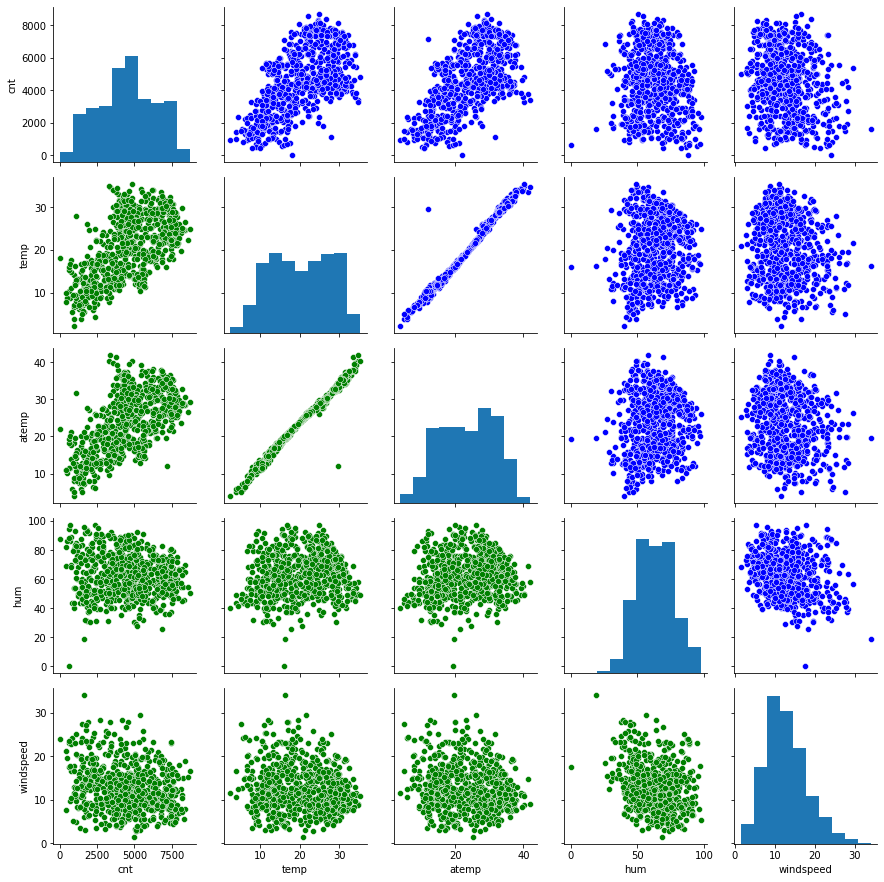

In [62]:
# instead of using the same color using a Pair Grid to isolate the pairs in a visually indipendant way
pg = sns.PairGrid(bike_data,vars = ['cnt', 'temp', 'atemp', 'hum','windspeed'])
pg.map_upper(sns.scatterplot,color = 'blue')
pg.map_lower(sns.scatterplot, color = 'green')
pg.map_diag(plt.hist,)


 <font color='dodgerblue'> From the plot we can see there is a linear relationship between atemp and temp and they are highly corelated

### Create a plain pair plot for the entire data set


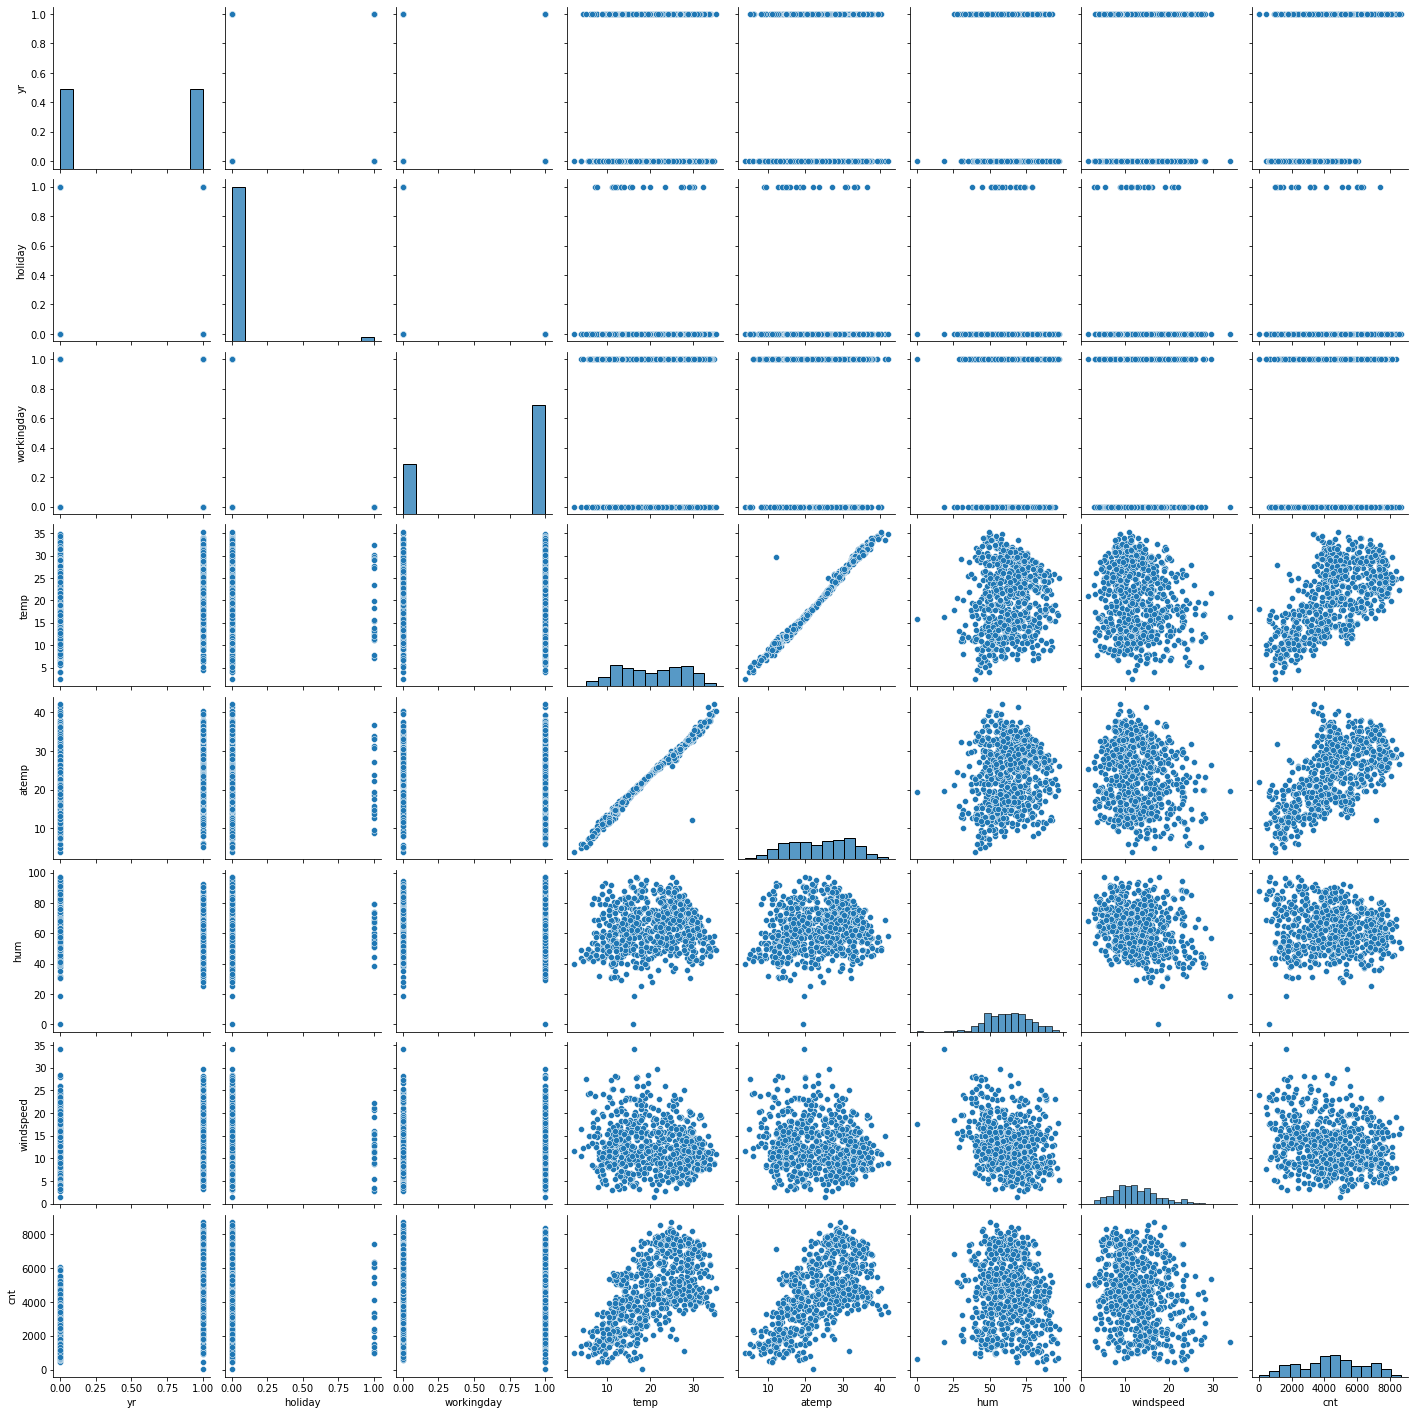

In [63]:
sns.pairplot(bike_data, palette = "Greens")
plt.show()

Significantly Higher Correlation existe between 'atemp' and 'temp', and it is expectd since they are describing the same data
temp (Temprature) is one of the key factor that influences the cnt (count of rider(es))

### Create a heatmap for data set to check corelaration of other factors

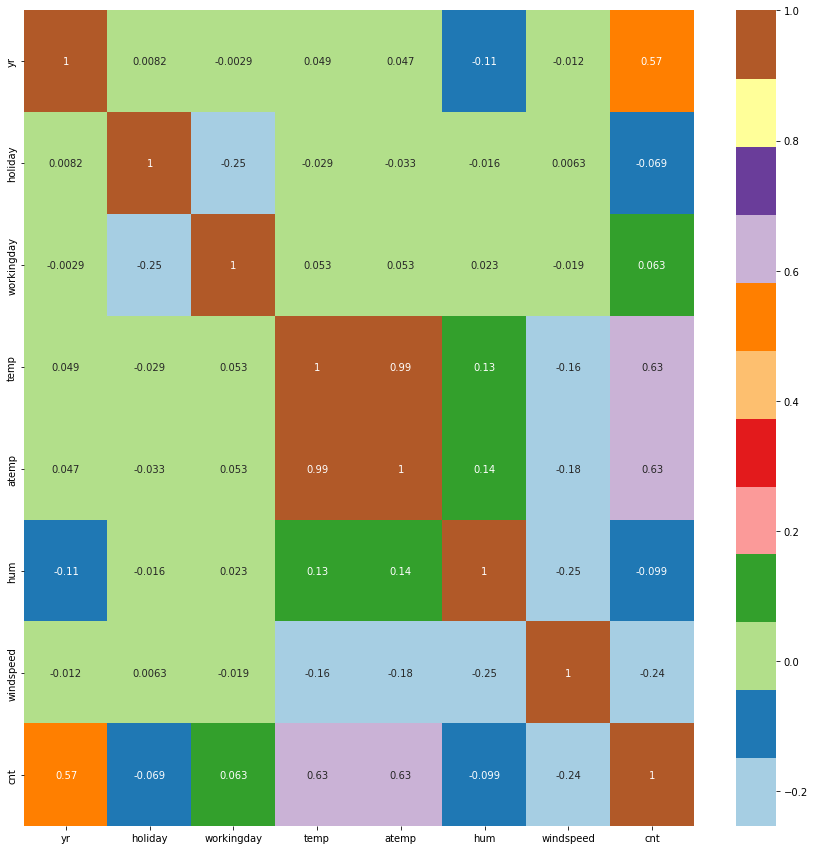

In [64]:
plt.figure(figsize=(15,15))
sns.heatmap(bike_data.corr(), cmap = "Paired", annot = True)
plt.show()

<font color="dodgerblue"> 

1.   Drop the Highly Corelated Variable - in this case atemp
2.   season has a high influance on the data
temp also shows some anount of relation
weather shows significant effect on sales
working/ week days has a significant effect on the data



# Dummy Variable 
Variables mnth, weekday, season, weathersit have various level
- weathersit - 4 levels
- mnth - 12 levels
- season - 4 levels
- weekday - 7 levels


In [65]:
dummy = bike_data[['season','mnth','weekday','weathersit']]

In [66]:
dummy = pd.get_dummies(dummy, drop_first = True )

In [67]:
bike_data = pd.concat([dummy, bike_data],axis = 1)

### Check the data frame and the info details

In [68]:
bike_data.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain and Snow,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,Spring,0,Jan,0,Sat,0,Cloudy,14.1108,18.1812,80.5833,10.7499,985
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,Spring,0,Jan,0,Sun,0,Cloudy,14.9026,17.6869,69.6087,16.6521,801
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Spring,0,Jan,0,Mon,1,Clear,8.0509,9.4703,43.7273,16.6367,1349
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Spring,0,Jan,0,Tue,1,Clear,8.2000,10.6061,59.0435,10.7398,1562
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Spring,0,Jan,0,Wed,1,Clear,9.3052,11.4635,43.6957,12.5223,1600


In [69]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   season_Spring                   730 non-null    uint8  
 1   season_Summer                   730 non-null    uint8  
 2   season_Winter                   730 non-null    uint8  
 3   mnth_Aug                        730 non-null    uint8  
 4   mnth_Dec                        730 non-null    uint8  
 5   mnth_Feb                        730 non-null    uint8  
 6   mnth_Jan                        730 non-null    uint8  
 7   mnth_Jul                        730 non-null    uint8  
 8   mnth_Jun                        730 non-null    uint8  
 9   mnth_Mar                        730 non-null    uint8  
 10  mnth_May                        730 non-null    uint8  
 11  mnth_Nov                        730 non-null    uint8  
 12  mnth_Oct                        730 

### Drop the original variables

In [70]:
bike_data.drop(['season'],axis = 1, inplace = True)

In [71]:
bike_data.drop(['weathersit'],axis=1, inplace = True)

In [72]:
bike_data.drop(['weekday'],axis = 1, inplace = True)

In [75]:
bike_data.drop(['mnth'],axis = 1, inplace = True)

In [76]:
bike_data.shape

(730, 30)